In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) -1 # 最后一个默认是y值
    dataMat = []
    labelMat = []
    with open(fileName) as fr:
        for line in fr.readlines():
            lineArr = []
            curLine = line.strip().split('\t') 
            for i in range(numFeat):
                lineArr.append(float(curLine[i])) # 这里可以使用np.ndarray 的自动类型转换，以及loadtext函数，自动将类型装换为float64
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [81]:
def standRegress(xArr,yARR):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr).T
    xTx = xMat.T*xMat
    if np.linalg.det(xTx) == 0.0: # np.linalg.det() 检查行列式是否为零
        print('行列式为0，逆矩阵不存在')
        return 
#     ws = xTx.I *(xMat.T*yMat)
    ws  = np.linalg.solve(xTx,xMat.T*yMat) # 解未知矩阵
    return ws

In [11]:
xArr,yArr = loadDataSet('./ex0.txt')

In [82]:
ws = standRegress(xArr,yArr)
ws

matrix([[ 3.00774324],
        [ 1.69532264]])

In [83]:
xMat = np.mat(xArr)
yMat = np.mat(yArr).T
yHat = xMat * ws

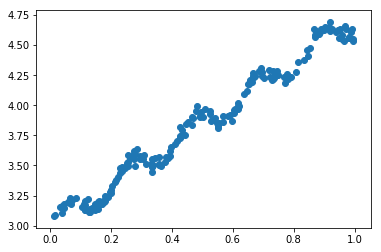

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.scatter(xMat[:,1],yMat[:,0]) # 绘图需要使用的维度必须是1维的
ax.scatter(xMat[:,1].T.A,yMat[:,0].T.A)
plt.show()

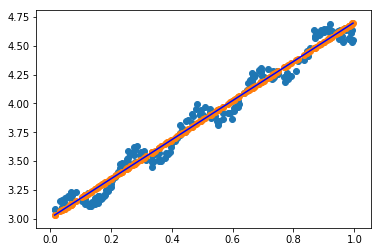

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xMat[:,1].T.A,yMat[:,0].T.A)
# sortedIndex = xMat.argsort(0)
# ax.scatter(xMat[sortedIndex[:,0],1].flatten().A,yHat[:,0].T.A)
xCopy = xMat.copy()
yHat = xCopy*ws
ax.scatter(xCopy[:,1].T.A,yHat[:,0].T.A) 
# 散点图要求数据维度为1维
# 绘制散点图可以避免因为数据点横坐标混乱导致的直线抽疯
xCopy1 = xMat.copy()
xCopy1 .sort(0) # 对横坐标排序
yHat1 = xCopy1*ws
ax.plot(xCopy1[:,1],yHat1[:,0],c='b')
plt.show()

In [103]:
# 使用相关系数衡量预测值与实际值的相似程度
np.corrcoef(yHat.T,yMat.T)

array([[ 1.        ,  0.98647356],
       [ 0.98647356,  1.        ]])